In [2]:
# Import neccessary packages

%matplotlib inline

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris

# iris dataset is available from scikit-learn package
iris = load_iris()

# Load the X (features) and y (targets) for training
X_train = iris['data']
y_train = iris['target']

# Load the name labels for features and targets
feature_names = iris['feature_names']
names = iris['target_names']


np.reshape(X_train, (150, 4))

np.reshape(y_train, (150, 1))



print(y_train.shape)


class irisClassification(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        
        super(irisClassification, self).__init__()
        
        self.layer1 = nn.Linear(input_dim, 20)
        self.layer2 = nn.Linear(20, output_dim)

        
    def forward(self, x):
        #x = F.relu(self.layer1(x))
        #x = self.layer2(x)
        
        out = self.layer2(self.layer1(x))
        
        return out
    
model = irisClassification(input_dim = 4, output_dim = 1)

learning_rate = 0.01
epochs  = 50 # This has to be <50

# We will use gradient descent for our optimizer and Mean Squared Error Loss function
loss_func = nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# Define a list or numpy array placeholder to keep track of our training loss

loss_list = []
epochs_list = []

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()


for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    outputs = outputs[:,0]
    loss = loss_func(outputs, y_train)
    loss_list.append(loss.item())
    epochs_list.append(epoch)

    loss.backward()
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))

(150,)
epoch 0, loss 0.6601159572601318
epoch 1, loss 0.6617733240127563
epoch 2, loss 0.6819351315498352
epoch 3, loss 0.6507980227470398
epoch 4, loss 0.6369578838348389
epoch 5, loss 0.5696346759796143
epoch 6, loss 0.5237724184989929
epoch 7, loss 0.4422195851802826
epoch 8, loss 0.3858679234981537
epoch 9, loss 0.31550416350364685
epoch 10, loss 0.2677119970321655
epoch 11, loss 0.21862271428108215
epoch 12, loss 0.18542823195457458
epoch 13, loss 0.1550448089838028
epoch 14, loss 0.1342768371105194
epoch 15, loss 0.11650456488132477
epoch 16, loss 0.10411510616540909
epoch 17, loss 0.09390798956155777
epoch 18, loss 0.08662723004817963
epoch 19, loss 0.08074860274791718
epoch 20, loss 0.07645796239376068
epoch 21, loss 0.07302519679069519
epoch 22, loss 0.07046479731798172
epoch 23, loss 0.06842052191495895
epoch 24, loss 0.06686455756425858
epoch 25, loss 0.06561855226755142
epoch 26, loss 0.06465162336826324
epoch 27, loss 0.06387180089950562
epoch 28, loss 0.06325479596853256


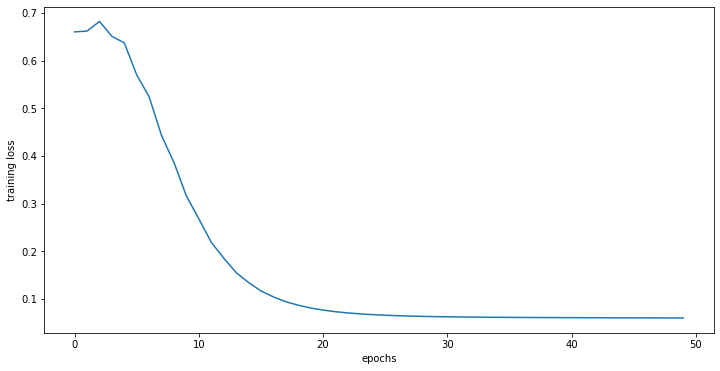

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(epochs_list, loss_list)
plt.xlabel('epochs')
plt.ylabel('training loss')
plt.show()

In [1]:

with torch.no_grad():
    predictions_train = model(X_train)
    
correct = 0
for i in range(149):
    if np.around(predicted[i],0) == y_train[i]:
        correct += 1

print(str(correct/150*100) +"% correct")



'\nwith torch.no_grad():\n    predictions_train = model(X_train)\n    \ncorrect = 0\nfor i in range(149):\n    if np.around(predicted[i],0) == y_train[i]:\n        correct += 1\n\nprint(str(correct/150*100) +"% correct")\n'